# About Dataset

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

##  Source and link
Source: Kaggel
Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Author: Bao Thai

# Import needed libraries and packages

In [1]:
import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install scipy
from scipy import stats
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
!pip install xgboost
from xgboost import XGBClassifier
from csv import reader


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading Dataset

In [2]:
data_original = pd.read_csv('C:/Users/Admin/Desktop/Projects/creditcard.csv')
df = data_original.copy()
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Explore Data

In [53]:
df.shape

(284807, 31)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [56]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
Class_count = df['Class'].value_counts()
Class_count

0    284315
1       492
Name: Class, dtype: int64

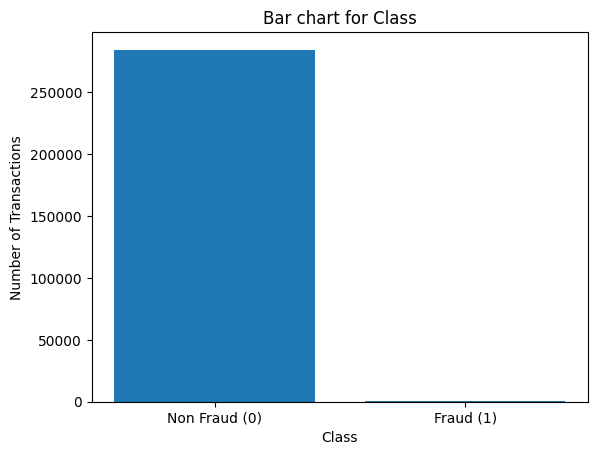

In [5]:
plt.bar(Class_count.index, Class_count)
plt.title ('Bar chart for Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0,1],['Non Fraud (0)','Fraud (1)'])
plt.show()

This bar chart illustrates the target column named 'Class' with a significant imbalance between two values: 0 and 1, Non Fraud and Frau respectively. I will address this issue later

## Preprocessing and Visualizing

In [3]:
df['Time'] = pd.to_datetime(df['Time'], unit = 'h')
df['Time'] = df['Time'].dt.hour
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,10,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,11,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,12,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,12,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,16,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
Count_0 = df[df['Class']==0].groupby('Time').count()['Class']
Count_1 = df[df['Class']==1].groupby('Time').count()['Class']
df_counts = pd.concat([Count_0, Count_1], axis = 1, keys = ['Class 0', 'Class 1'])
df_counts = df_counts.reset_index()
df_counts

,Time,Class 0,Class 1
0,0,11655,9
1,1,11650,17
2,2,11799,17
3,3,11806,23
4,4,11960,24
5,5,11887,17
6,6,11870,23
7,7,11709,18
8,8,11806,19
9,9,11944,22


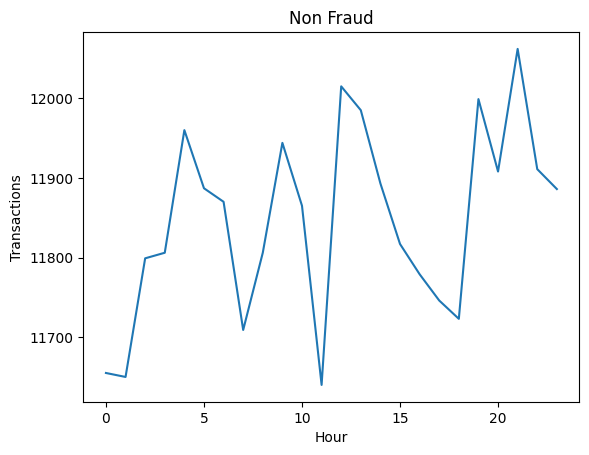

In [5]:
plt.plot(df_counts['Time'], df_counts['Class 0'])
plt.title('Non Fraud')
plt.xlabel('Hour')
plt.ylabel('Transactions')
plt.show()

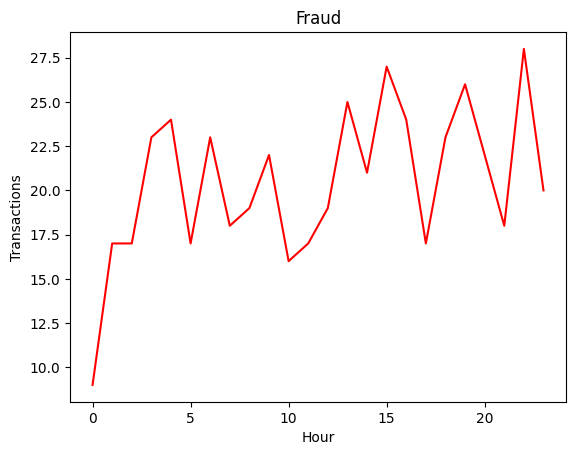

In [27]:
plt.plot(df_counts['Time'],df_counts['Class 1'], color = 'red')
plt.title('Fraud')
plt.xlabel('Hour')
plt.ylabel('Transactions')
plt.show()

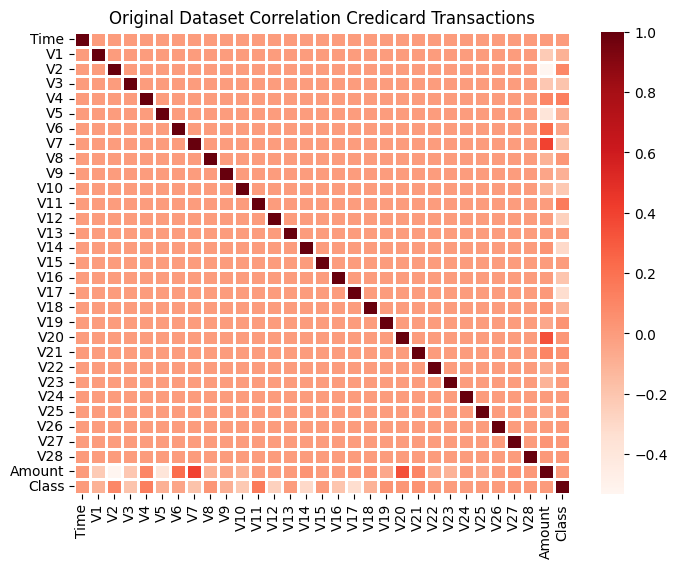

In [17]:
plt.figure(figsize = (8,6))
plt.title('Original Dataset Correlation Credicard Transactions')
sns.heatmap(df.corr(), linewidths = 1 ,cmap = 'Reds')
plt.show()

## Resampling Data

In [10]:
Class_0 = df[df['Class'] == 0]
sample_size = 492
sample_Class_0 = Class_0.sample(sample_size, random_state = 0)
print(sample_Class_0.value_counts(sample_Class_0['Class']))
print(sample_Class_0)

Class
0    492
dtype: int64
        Time        V1        V2        V3        V4        V5        V6  \
266085    15  2.049094  0.186189 -1.707198  0.530768  0.160589 -1.448570   
172120     7  2.125540 -0.030714 -1.527653  0.121046  0.543172 -0.347988   
15136     12 -4.155859 -5.705748  0.274699 -0.993262 -6.059393  5.210848   
96393     15 -0.566420 -0.579576  0.823503 -1.451240 -0.583587  0.206381   
208225     9  0.060858 -0.261762 -1.699493 -1.202327  3.699527  3.196249   
...      ...       ...       ...       ...       ...       ...       ...   
170744    20 -0.995867  1.201192  0.395282 -0.886059  1.706389 -0.367065   
222921    19 -1.008598 -0.075940  2.004425 -0.505601  0.509548  0.171588   
188275     3 -1.773275 -1.718423  1.455868 -2.174910  1.570504 -0.734998   
44186      2 -0.524514  1.353868  0.217128  1.241104 -0.045413 -0.880130   
147585     8 -1.731798  1.418551  0.565101  1.196712  0.365576 -0.299215   

              V7        V8        V9  ...       V21       V

I created a new DataFrame for values with Class 0. Then I randomly choosed sample 492 elements, compared with Class 1 also 492 elements.Next, I will merge the new DataFrame with Class 0 and the DataFrame with Class 1 to create a balanced DataFrame. Let's check!

In [11]:
Class_1 = df[df['Class'] == 1]
df_balanced = pd.concat([Class_1, sample_Class_0], axis = 0, ignore_index = True)
df_balanced.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,22,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,16,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,22,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,2,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [12]:
new_class = df_balanced['Class'].value_counts()
new_class

1    492
0    492
Name: Class, dtype: int64

I successfully address the imbalanced data. Now, the result show that both values 0 and 1 have 492 instances. To make it easier to visualize, I will put them on a bar chart below. Let's check!

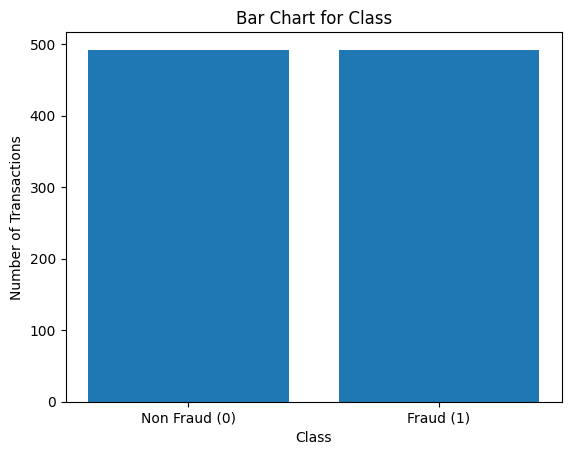

In [13]:
plt.bar(new_class.index, new_class)
plt.title('Bar Chart for Class')
plt.xlabel ('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non Fraud (0)', 'Fraud (1)'])
plt.show()

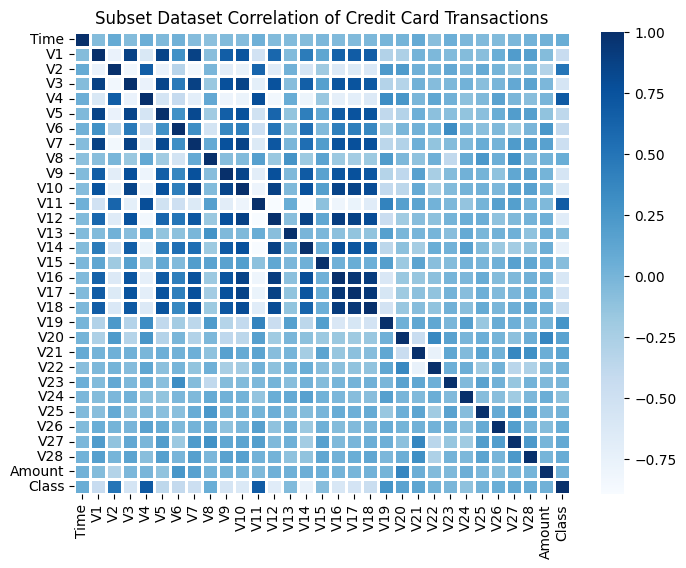

In [14]:
plt.figure(figsize = (8,6))
plt.title('Subset Dataset Correlation of Credit Card Transactions')
sns.heatmap(df_balanced.corr(),linewidths = 1, cmap = 'Blues')
plt.show()

## Data Preprocessing On Subset Dataset

In this part, I split the dataset into training and testing sets. X is features for classification variables to the target column y. It means, y contain 'Class' within there are 0 and 1. And the models will use the rest columns to classificate whether a variable is in 0 or is in 1.

In [28]:
X = df_balanced.drop(['Class'], axis = 1)
y = df_balanced['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 10)

Next, I do standardizate data

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Building Models

In this par, I will build 8 models machine learning to solve this case.

In [3]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
xgb = XGBClassifier()

In [37]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        95
           1       0.96      0.83      0.89       102

    accuracy                           0.89       197
   macro avg       0.90      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197

[[91  4]
 [17 85]]


In [39]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.93      0.87      0.90       102

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

[[88  7]
 [13 89]]


In [40]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92        95
           1       0.99      0.84      0.91       102

    accuracy                           0.91       197
   macro avg       0.92      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197

[[94  1]
 [16 86]]


In [41]:
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        95
           1       0.98      0.84      0.91       102

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

[[93  2]
 [16 86]]


In [42]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        95
           1       0.96      0.85      0.90       102

    accuracy                           0.90       197
   macro avg       0.91      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197

[[91  4]
 [15 87]]


In [43]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        95
           1       0.96      0.84      0.90       102

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

[[91  4]
 [16 86]]


In [44]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        95
           1       0.97      0.83      0.89       102

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197

[[92  3]
 [17 85]]


In [45]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91        95
           1       0.96      0.87      0.91       102

    accuracy                           0.91       197
   macro avg       0.92      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197

[[91  4]
 [13 89]]


The results indicate that the models perform quite well on this data subset. To avoid bias opinions, I have selected more 3 models with lower accuracy (Logistic Regression, SVC, Decision Tree Classifier) to compare with the top 3 models (Random Forest Classifier,Gradient Boosting Classifier, XGB Classifier) with the highest accuracy score of 91% to re-run on the original dataset in order to assess and compare the effectiveness of these 6 models.

## Re-Test On Original Dataset

In [4]:
X = df.drop(['Class'], axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

These are 3 top result models on data subset:

In [6]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.98      0.77      0.86       108

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56852     2]
 [   25    83]]


In [7]:
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.77      0.80      0.79       108

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56829    25]
 [   22    86]]


In [8]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.98      0.79      0.87       108

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56852     2]
 [   23    85]]


These are 3 lower result models on data subset:

In [9]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.97      0.67      0.79       108

    accuracy                           1.00     56962
   macro avg       0.99      0.83      0.90     56962
weighted avg       1.00      1.00      1.00     56962

[[56852     2]
 [   36    72]]


In [10]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.87      0.80      0.83       108

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56841    13]
 [   22    86]]


In [11]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Classification_rp = classification_report(y_test, y_pred)
print(Classification_rp)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.68      0.74       108

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56838    16]
 [   35    73]]


We can observe that the three models with lower accuracy rates (Logistic Regression, SVC, Decision Tree) on the subset of the data are likely to yield poor results when predicting the value 1 ('Fraud'), as the prediction rates are quite low. This suggests that these three models are not effective on the original full dataset. Conversely, the three models with the best results (Random Forest Classifier, Gradient Boosting, XGB) exhibit relatively high prediction rates for the value 1 ('Fraud'). This demonstrates that on this dataset, these three models have performed exceptionally well in identifying cases of 'Fraud,' even though there is a considerable imbalance in the dataset.

## In Conclusion

From the conclusion above, we are only considering the top-performing three models on the original full dataset (Random Forest Classifier, Gradient Boosting, XGB). We can observe that the most effective performance comes from XGB, as this model has accurately identified cases of 1 ('Fraud') the best among the three models. Therefore, XGB stands out as the best-performing model for addressing this particular scenario.